In [61]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from pandas import TimeGrouper
rcParams['figure.figsize'] = 16,4

# Show the fraction of data set

df = pd.read_csv('database.csv', low_memory=False)
df.head()

Populating the interactive namespace from numpy and matplotlib


ImportError: No module named 'statsmodels'

In [19]:
df.Month = pd.to_datetime(df.Month, format='%B').dt.month.map("{:02}".format)
df['Date'] = df.apply(lambda row: '{}-{}'.format(row.Year, row.Month), axis=1)
df.reset_index()
df.Date = pd.to_datetime(df.Date, format='%Y-%m')
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Date
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,01,1,Murder or Manslaughter,...,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,1980-01-01
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,03,1,Murder or Manslaughter,...,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,1980-03-01
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,03,2,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,1980-03-01
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,04,1,Murder or Manslaughter,...,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,1980-04-01
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,04,2,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,1980-04-01


In [13]:
# Create Date field

df.Month = pd.to_datetime(df.Month, format='%B').dt.month.map("{:02}".format)
df['Date'] = df.apply(lambda row: '{}-{}'.format(row.Year, row.Month), axis=1)
df.reset_index()
df.Date = pd.to_datetime(df.Date, format='%Y-%m')
df.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,119,1,105,39,2992,20,15,4,190,438,...,0,112,1642,6,1,44,30,10,17,1
1980-02-01,63,8,75,21,2526,54,7,30,120,283,...,1,140,2077,9,1,40,14,13,40,3
1980-03-01,103,3,49,19,2346,16,24,2,91,385,...,0,124,3426,4,0,60,30,6,71,3
1980-04-01,72,4,106,55,3743,39,49,5,105,272,...,0,177,1908,1,0,49,38,4,23,2
1980-05-01,78,4,70,29,2854,76,10,1,153,1143,...,2,234,2065,6,0,63,44,17,22,1


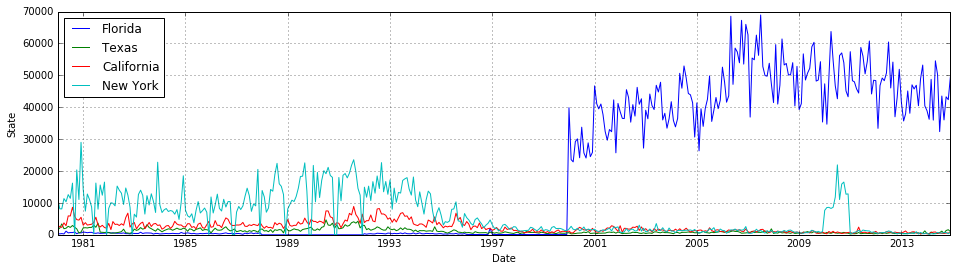

In [15]:
# Aggregate data summing month incident for every state

states = df[['Date', 'State', 'Incident']]
states = states.groupby(['Date', 'State'])['Incident'].sum().unstack()
states = states.fillna(0)
states.reset_index()
states.head()

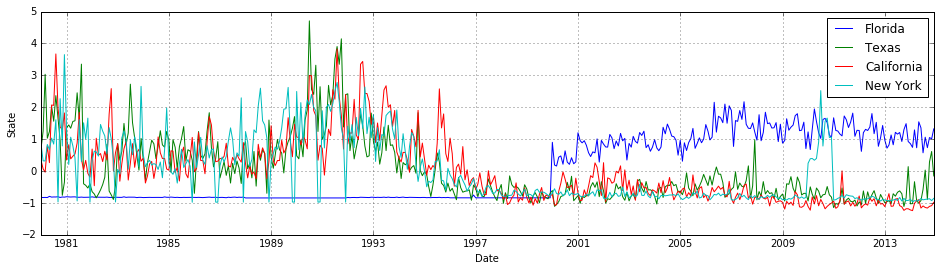

In [16]:
# Plot several state time series

my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Florida', 'Texas', 'California', 'New York']:
    ax.plot(my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

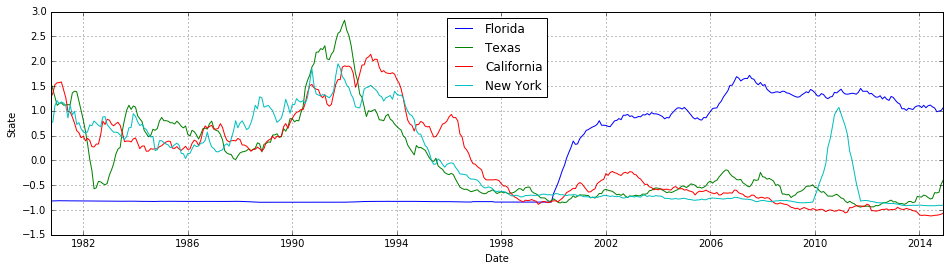

In [15]:
# Normalize and plot several state time series

my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Florida', 'Texas', 'California', 'New York']:
    ax.plot((my_series[state] - my_series[state].mean()) / my_series[state].std(), linestyle='-',
            label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

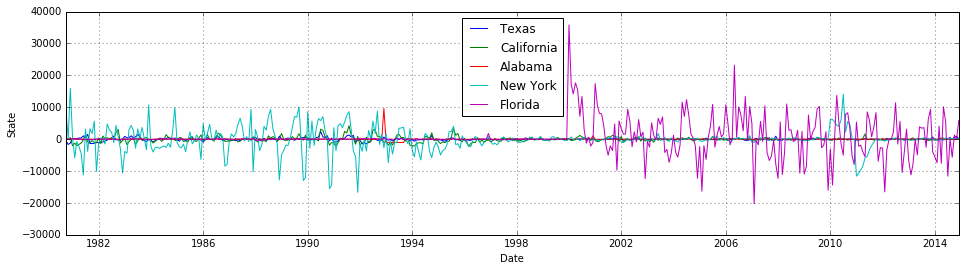

In [17]:
my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Florida', 'Texas', 'California', 'New York']:
    # ax.plot(my_series[state], linestyle='-', label="{}".format(state))
    ax.plot(((my_series[state] - my_series[state].mean()) / my_series[state].std()).rolling(window=10).mean(), linestyle='-',
            label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Texas', 'California', 'Alabama', 'New York', 'Florida']:
    ax.plot(my_series[state] - my_series[state].rolling(window=10).mean(), linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
# Calculate exponential weighted mean (EWM)

my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Texas', 'California', 'Alabama', 'New York', 'Florida']:
    ax.plot(my_series[state].ewm(halflife=10).mean(), linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
# Removing linear trend

my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Texas', 'California', 'Alabama', 'New York', 'Florida']:
    ax.plot(my_series[state] - my_series[state].ewm(halflife=10).mean(), linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Texas', 'California', 'Alabama', 'New York', 'Florida']:
    ax.plot(np.log(my_series[state] - my_series[state].mean()), linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
# Test for randomness (lag_plot): Alaska

my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Alaska']:
    ts = my_series[state]
    lag_plot(ts)
    ax.plot(ts, ts, 'r-')
    ax.plot(ts, ts + 5, 'g-')
    ax.plot(ts, ts - 5, 'g-')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
# Test for randomness (lag_plot): Texas

my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Texas']:
    ts = my_series[state]
    lag_plot(ts)
    ax.plot(ts, ts, 'r-')
    ax.plot(ts, ts + 500, 'g-')
    ax.plot(ts, ts - 500, 'g-')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
my_series = pd.DataFrame()
i = 0
for state in list(states):
    my_series[state] = states[states.columns[i]]
    i += 1
fig = plt.figure()
ax = plt.subplot(111)
for state in ['Texas']:
    ts = my_series[state]
    lag_plot(ts)
    ax.plot(ts, ts, 'r-')
    ax.plot(ts, ts + 500, 'g-')
    ax.plot(ts, ts - 500, 'g-')
plt.ylabel('State')
plt.xlabel('Date')
plt.grid()
plt.show()

In [ ]:
# Test for ramdomness: Ad Fuller - Florida

tsa.adfuller(my_series['Florida'],autolag='AIC')

In [ ]:
# Test for ramdomness: Autocorrelation plot - Florida

autocorrelation_plot(my_series['Florida'])

In [ ]:
autocorrelation_plot(my_series['Alabama'])

In [ ]:
autocorrelation_plot(my_series['California'])

In [ ]:
autocorrelation_plot(my_series['Texas'])

In [ ]:
# Some states (6) are distinct

plt.matshow(my_series, interpolation=None, aspect='auto')